# Coursework 4

### PLAGIARISM/COLLUSION DECLARATION

 

Coursework submitted for assessment must be the original work of you and your group. Assignments are subjected to regular checks for plagiarism and/or collusion. Plagiarism is the presentation of another person’s thoughts or words (those outside your group) as if they were your own. Collusion involves obtaining help from someone outside your group to complete your work. In preparing your coursework, you should not seek help, or copy from any other person or source, including the

Internet, without proper and explicit acknowledgement.

 

There is a procedure in place for you to declare individual contributions within your group for courswork. You must declare the contributions fairly and accurately.

 

You must not disclose your solutions or insights related to coursework with anyone else, including future students or the Internet.

 

By acknowledging the the statements above, you are declaring that both this and all subsequent pieces of coursework are, and will remain, the original work of you and your group.

 

* Submissions will not be accepted without the aforementioned declaration.

 

* Members of a group are deemed to have collective responsibility for the integrity for work submitted and are liable for any penalty imposed, proportionate to their contributions.

In [1]:
using JLD2,FileIO



In [2]:
Base.@kwdef mutable struct CourseWork_4
    
    CID::Int
    Plagiarism_declare::Union{Missing,Bool}
    
    # 11. MRI CS Recovery: ADMM
    
    Q11_data_Z1::Matrix
    Q11_data_Z2::Matrix
    Q11_data_U1::Matrix
    Q11_data_U2::Matrix
    Q11_data_Omega::Matrix
    Q11_data_y::Vector
    Q11_data_lambda_1::Float64
    Q11_data_lambda_2::Float64
    Q11_data_rho::Float64
    
    Q11_1_ans_X::Union{Missing,Matrix}
    Q11_2_ans_Z1::Union{Missing,Matrix}
    Q11_2_ans_Z2::Union{Missing,Matrix}
    Q11_3_ans_U1::Union{Missing,Matrix}
    Q11_3_ans_U2::Union{Missing,Matrix}
    Q11_4_ans_R::Union{Missing,Matrix}
    Q11_5_ans_S::Union{Missing,Matrix}
    Q11_6_ans_X::Union{Missing,Matrix}
    
    # 12. Blind Deconvolution: Convex Relaxation and ADMM
    
    Q12_data_Z1::Matrix
    Q12_data_Z2::Matrix
    Q12_data_U1::Matrix
    Q12_data_U2::Matrix
    Q12_data_y::Vector
    Q12_data_lambda_1::Float64
    Q12_data_lambda_2::Float64
    Q12_data_rho::Float64
    
    Q12_1_ans_X::Union{Missing,Matrix}
    Q12_2_ans_Z1::Union{Missing,Matrix}
    Q12_2_ans_Z2::Union{Missing,Matrix}
    Q12_3_ans_U1::Union{Missing,Matrix}
    Q12_3_ans_U2::Union{Missing,Matrix}
    Q12_4_ans_R::Union{Missing,Matrix}
    Q12_5_ans_S::Union{Missing,Matrix}
    Q12_6_ans_X::Union{Missing,Matrix}
    Q12_7_ans_s::Union{Missing,Vector}
    Q12_7_ans_h::Union{Missing,Vector}
    
    # 13. Neural Network Training: Block Coordinate Descent
    
    Q13_data_Y::Matrix
    Q13_data_X::Matrix
    Q13_data_Ytest::Matrix
    Q13_data_Xtest::Matrix
    Q13_data_X1::Matrix
    Q13_data_Z1::Matrix
    Q13_data_Z2::Matrix
    Q13_data_alpha::Float64
    
    Q13_1_ans_W1::Union{Missing,Matrix}
    Q13_1_ans_W2::Union{Missing,Matrix}
    Q13_2_ans_X1::Union{Missing,Matrix}
    Q13_3_ans_Z1::Union{Missing,Matrix}
    Q13_3_ans_Z2::Union{Missing,Matrix}
    Q13_4_ans_g::Union{Missing,Matrix}
    Q13_5_ans_f::Union{Missing,Vector}
    Q13_5_ans_gx::Union{Missing,Vector}
    Q13_5_ans_l::Union{Missing,Vector}
    Q13_5_ans_ltest::Union{Missing,Vector}
    
    
end

CourseWork_4

In [3]:

# Example

data = JLD2.load("Browne Liam1943834StudentFile.jld2");

data = data[ "CourseWork_4" ];


 

# jldopen("xxx.jld3", "w") do file

#    write(file, "CourseWork_3", A)

# end


CourseWork_4(1943834, missing, [1.4825556061605214 -1.0548528810676852 … -1.1662979933278885 0.3809254449594762; -0.44021421501548125 0.4059139754279183 … -1.3414853833506677 -0.12299242956994; … ; -0.5996139656371436 -0.03974983201294865 … 0.46876824097674685 1.4802359637025313; 0.45253919175375223 -0.4840840704764895 … -1.1193366608355588 0.5032523724156613], [0.02974328773300374 0.2622945027421596 … -0.18534840326973123 -0.4591612415831861; -0.6019511216074958 0.045276875366522015 … -1.9774645706131284 -0.004358410696958043; … ; -0.8002596033144154 1.3982319635954337 … -1.1757191114087648 -2.682465853378287; -1.671051789135585 -0.9039186531835108 … 0.9521502432804972 -0.047940122348837426], [1.7629723754771478 0.1375200958125602 … -0.5025522513087273 0.43722654321008486; -0.26579064672670044 0.4478676988472639 … 1.0712762165776368 0.6641258896391038; … ; -0.7656689000587834 0.012929126055684286 … -1.1852876878601775 1.3064924012570092; 1.0385286299672858 0.7905459817214568 … 0.80721

In [4]:
using FFTW
using Wavelets, WaveletsExt
using LinearAlgebra

# Helper functions

function wavet(X)
    # Using WT.haar yields same result as WT.db1
    return dwt(X, wavelet(WT.haar))
end

function iwavet(Z)
    return idwt(Z, wavelet(WT.haar))
end

function opA(X, Omega)
    # Apply 2D FFT
    O1 = fft(X)
    # Apply 2D FFT Shift
    O2 = fftshift(O1)
    # Apply element-wise mask
    O3 = Omega .* O2
    # Vectorise O3
    y = []
    cnt = 1
    for i in 1:size(Omega)[1]
        for j in 1:size(Omega)[2]
            if(Omega[j, i] != 0)
                push!(y, O3[j, i])
                cnt = cnt + 1
            end
        end
    end

    # return O1, O2, y
    return y
end


function opAadj(y, Omega)
    # Reconstruct y into a sparse matrix
    O1_init = zeros(ComplexF64, size(Omega)[1], size(Omega)[2])
    cnt = 1
    for i in 1:size(Omega)[1]
        for j in 1:size(Omega)[2]
            if(Omega[j, i] != 0)
                O1_init[j, i] = y[cnt]
                cnt = cnt + 1
            end
        end
    end
    O1 = O1_init
    # fftshift is self-adjoint
    O2 = ifftshift(O1)
    # Adjoint of FFT is its inverse
    O3 = ifft(O2)

    # return O1, O2, O3

    return O3
end


# Soft Threshold for Complex Numbers
function soft_thresh(w, threshold)
    magnitudes = abs(w)
    soft_magnitudes = max(magnitudes - threshold, 0)
    result = soft_magnitudes * cis(angle(w))
    return result
end

soft_thresh (generic function with 1 method)

In [5]:
Z1 = data.Q11_data_Z1
Z2 = data.Q11_data_Z2
U1 = data.Q11_data_U1
U2 = data.Q11_data_U2
Omega = data.Q11_data_Omega
y = data.Q11_data_y
lambda1 = data.Q11_data_lambda_1
lambda2 = data.Q11_data_lambda_2
p = data.Q11_data_rho

function X_upd(y, Omega, Z1, Z2, U1, U2, p)
    n = 1
    # The problem is of the form Ax = B
    B = opAadj(y, Omega) + iwavet(Z1) - iwavet(U1) + idct(Z2) - idct(U2)

    # The below finds inv(A) and then uses this to determine X
    Λ = Diagonal(((n).*vec(Omega) .+ 2*p))
    V = Diagonal(1 ./ (((n).*vec(Omega) .+ 2*p)))
    X_vec = V * vec(fftshift(fft(B)))
    X = zeros(ComplexF64, size(Omega))

    k = 1
    for i in 1:size(Omega)[2]
        for j in 1:size(Omega)[1]
            X[j, i] = X_vec[k]
            k = k+1
        end
    end

    return real.(ifft(ifftshift(X)))
end

function Z_upd(transf_X_updated, U, p, lambda)
    return soft_thresh.((transf_X_updated+(U/p)), (lambda/p))
end

function U_upd(U, Z_updated, transf_X_updated, p)
    return U + p * (transf_X_updated - Z_updated)
end

function res_primal(X_updated, Z1_updated, Z2_updated)
    res_1 = wavet(X_updated) - Z1_updated
    res_2 = dct(X_updated) - Z2_updated
    return vcat(res_1, res_2)
end

function res_dual(Z1_updated, Z2_updated, Z1, Z2, p)
    res_1 = p * wavet(Z1 - Z1_updated)
    res_2 = p * dct(Z2 - Z2_updated)
    return res_1 + res_2
end

X_1 = X_upd(y, Omega, Z1, Z2, U1, U2, p)
data.Q11_1_ans_X = X_1

Z1_1 = Z_upd(wavet(X_1), U1, p, lambda1)
Z2_1 = Z_upd(dct(X_1), U2, p, lambda2)
data.Q11_2_ans_Z1 = Z1_1
data.Q11_2_ans_Z2 = Z2_1

U1_1 = U_upd(U1, Z1_1, wavet(X_1), p)
U2_1 = U_upd(U2, Z2_1, dct(X_1), p)
data.Q11_3_ans_U1 = U1_1
data.Q11_3_ans_U2 = U2_1

R = res_primal(X_1, Z1_1, Z2_1)
S = res_dual(Z1_1, Z2_1, Z1, Z2, p)
data.Q11_4_ans_R = R
data.Q11_5_ans_S = S

X_prev = X_1
Z1_prev = Z1_1
Z2_prev = Z2_1
U1_prev = U1_1
U2_prev = U2_1

ep_pri = (sqrt(length(R)) + max(norm(vcat(wavet(X_prev), dct(X_prev))), norm(vcat(Z1_prev, Z2_prev))))/1000
ep_dual = (sqrt(length(S)) + norm(iwavet(U1_prev) + idct(U2_prev)))/1000

for i in 2:200
    if((norm(R) < ep_pri) && (norm(S) < ep_dual))
        break
    end
    X_up = X_upd(y, Omega, Z1_prev, Z2_prev, U1_prev, U2_prev, p)
    Z1_up = Z_upd(wavet(X_up), U1_prev, p, lambda1)
    Z2_up = Z_upd(dct(X_up), U2_prev, p, lambda2)
    U1_up = U_upd(U1_prev, Z1_up, wavet(X_up), p)
    U2_up = U_upd(U2_prev, Z2_up, dct(X_up), p)

    R = res_primal(X_up, Z1_up, Z2_up)
    S = res_dual(Z1_up, Z2_up, Z1_prev, Z2_prev, p)

    ep_pri = (sqrt(length(R)) + max(norm(vcat(wavet(X_up), dct(X_up))), norm(vcat(Z1_up, Z2_up))))/1000
    ep_dual = (sqrt(length(S)) + norm(iwavet(U1_up) + idct(U2_up)))/1000

    X_prev = copy(X_up)
    Z1_prev = copy(Z1_up)
    Z2_prev = copy(Z2_up)
    U1_prev = copy(U1_up)
    U2_prev = copy(U2_up)
end

data.Q11_6_ans_X = X_prev

128×128 Matrix{Float64}:
  0.00653015   0.00685508   0.00672113  …   0.00267222   0.00255188
  0.00681701   0.00671912   0.00630293      0.00277478   0.0029689
  0.00494262   0.00850294   0.00682805     -0.00330534  -0.00350769
  0.00916744   0.00394149   0.00690165      0.00880022   0.00901202
  0.0067137    0.00630512   0.00659995      0.00135335   0.000950523
  0.00647136   0.0063758    0.00664651  …   0.00101267   0.00101458
  0.00650532   0.00657032   0.00665213      0.0011416    0.00740378
  0.00665711   0.00679713   0.00700939      0.00119112   0.00722006
 -0.0782634   -0.0778878   -0.111218       -0.0957465   -0.0957481
 -0.175169    -0.174994    -0.168491       -0.156251    -0.156014
  ⋮                                     ⋱               
 -0.80938     -1.04544     -1.02851        -0.350617    -0.666198
 -1.58146     -1.45991     -1.48842     …  -1.70005     -1.74195
 -2.36138     -2.48295     -2.21265        -2.4187      -2.5593
 -1.91995     -1.62936     -1.65334        -1.

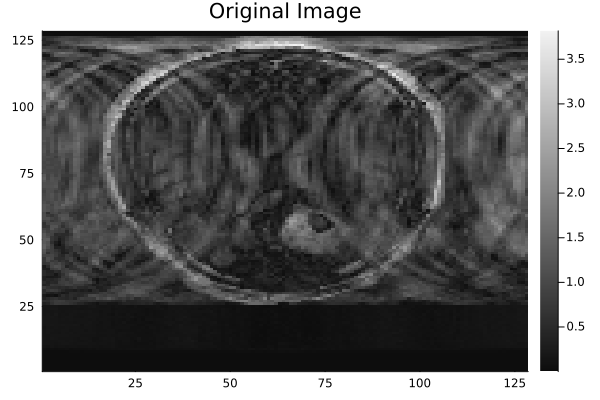

In [6]:
using Images
using FileIO
using Plots

p1 = plot(heatmap(abs.(opAadj(data.Q11_data_y, Omega)), color=:grays), title="Original Image", legend=false)
plot(p1)

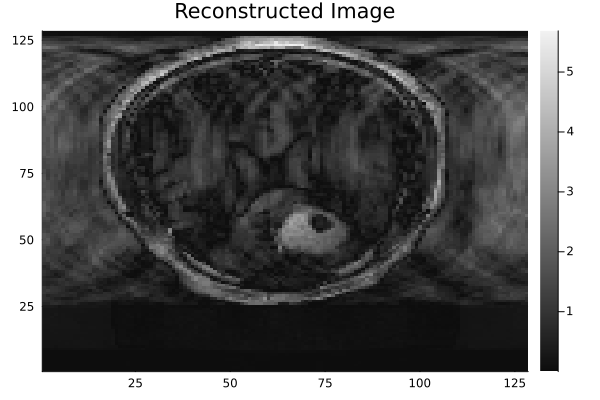

In [7]:
p2 = plot(heatmap(abs.(data.Q11_6_ans_X), color=:grays), title="Reconstructed Image", legend=false)
plot(p2)

In [ ]:
Y = data.Q13_data_Y
X = data.Q13_data_X
Ytest = data.Q13_data_Ytest
Xtest = data.Q13_data_Xtest
X1 = data.Q13_data_X1
Z1 = data.Q13_data_Z1
Z2 = data.Q13_data_Z2
alpha = data.Q13_data_alpha
using Pkg

function Relu(x)
    if (x >= 0)
        return x
    else
        return 0
    end
end

function step(x)
    if (x >= 0)
        return 1
    else
        return 0
    end
end

function fNN(W1, W2, X1, Z1, Z2, X, Y, alpha)
    term1 = 0.5 * (norm(Y - Relu.(Z2)))^2
    term2 = 0.5 * alpha * (norm(Z2 - W2*X1))^2
    term3 = 0.5 * alpha * (norm(X1 - Relu.(Z1)))^2
    term4 = 0.5 * alpha * (norm(Z1 - W1*X))^2

    return term1 + term2 + term3 + term4
end

function loss(W1, W2, X, Y)
    f = Relu.(W2*(Relu.(W1*X)))
    return (0.5 * (norm(Y-f))^2)
end

function W_update(Z, X)
    return (Z * adjoint(X)) * inv(X * adjoint(X) + alpha * I)
end

function X1_update(W2, Z1, Z2)
    return inv(adjoint(W2) * W2 + Diagonal(ones(size(W2)[2])))*(adjoint(W2) * Z2 + Relu.(Z1))
end

function proximal(a, b, alpha)
    if(((a+(alpha*b) >= 0) && (b >= 0)) || ((-1*(sqrt(alpha*(alpha+1)) - alpha)*a <= (alpha*b)) && ((alpha*b) < 0)))
        return (a+(alpha * b)) / (1+alpha)
    elseif ((-1*a <= (alpha*b)) && ((alpha*b) <= (-1*(sqrt(alpha*(alpha+1)) - alpha)*a)) && ((-1*(sqrt(alpha*(alpha+1)) - alpha)*a) < 0))
        return b
    elseif ((a+(alpha*b)) < 0)
        return min(b, 0)
    end
end

function Z1_update(W1, X1, X, alpha)
    a = X1
    b = W1*X
    alpha = 1
    return alpha .* (proximal.(a, b, alpha))
end

function Z2_update(W2, X1, Y, alpha)
    a = Y
    b = W2*X1
    return proximal.(a, b, alpha)
end

function g(W1, W2, X1, Z1, Z2, X, Y, alpha)
    W1_grad = vec(alpha * (Z1 - W1*X) * (-1 * adjoint(X)))
    W2_grad = vec(alpha * (Z2 - W2*X1) * (-1 * adjoint(X1)))

    X1_grad = vec(alpha * ((X1 - Relu.(Z1)) - (adjoint(W2) * (Z2 - W2*X1))))

    Z1_grad = vec(step.(Relu.(Z1)) - step.(X1) + alpha*(Z1-(W1*X)))
    Z2_grad = vec(step.(Relu.(Z2)) - step.(Y) + alpha*(Z2-(W2*X1)))

    return vcat(W1_grad, W2_grad, X1_grad, Z1_grad, Z2_grad)

end

W1_1 = W_update(Z1, X)
W2_1 = W_update(Z2, X1)
data.Q13_1_ans_W1 = W1_1
data.Q13_1_ans_W2 = W2_1

X1_1 = X1_update(W2_1, Z1, Z2)
data.Q13_2_ans_X1 = X1_1

Z1_1 = Z1_update(W1_1, X1_1, X, alpha)
Z2_1 = Z2_update(W2_1, X1_1, Y, alpha)
data.Q13_3_ans_Z1 = Z1_1
data.Q13_3_ans_Z2 = Z2_1

g_1 = g(W1_1, W2_1, X1_1, Z1_1, Z2_1, X, Y, alpha)
# Caste g_1 from a vector to an matrix of (nx1)
g_1_matrix = zeros(size(g_1)[1], 1)
g_1_matrix[:, 1] = g_1
data.Q13_4_ans_g = g_1_matrix

W1_k = W1_1
W2_k = W2_1
X1_k = X1_1
Z1_k = Z1_1
Z2_k = Z2_1

fNN_array = []
g_xbar_array = []
loss_array = []
test_loss_array = []

g_k = norm(g(W1_k, W2_k, X1_k, Z1_k, Z2_k, X, Y, alpha))
X_hat = norm([W1_k, W2_k, X1_k, Z1_k, Z2_k])/100

push!(fNN_array, fNN(W1_k, W2_k, X1_k, Z1_k, Z2_k, X, Y, alpha))
push!(g_xbar_array, g_k/(X_hat*100))
push!(loss_array, loss(W1_k, W2_k, X, Y))
push!(test_loss_array, loss(W1_k, W2_k, Xtest, Ytest))

for i in 2:100
    W1_k = W_update(Z1_k, X)
    W2_k = W_update(Z2_k, X1_k)

    X1_k = X1_update(W2_k, Z1_k, Z2_k)

    Z1_k = Z1_update(W1_k, X1_k, X, alpha)
    Z2_k = Z2_update(W2_k, X1_k, Y, alpha)

    g_k = norm(g(W1_k, W2_k, X1_k, Z1_k, Z2_k, X, Y, alpha))
    X_bar = norm([W1_k, W2_k, X1_k, Z1_k, Z2_k])/100

    push!(fNN_array, fNN(W1_k, W2_k, X1_k, Z1_k, Z2_k, X, Y, alpha))
    push!(g_xbar_array, g_k/(X_bar*100))
    push!(loss_array, loss(W1_k, W2_k, X, Y))
    push!(test_loss_array, loss(W1_k, W2_k, Xtest, Ytest))
end

data.Q13_5_ans_f = fNN_array
data.Q13_5_ans_gx = g_xbar_array
data.Q13_5_ans_l = loss_array
data.Q13_5_ans_ltest = test_loss_array



Iteration 2:          g = 18296.38826071207         X_hat = 13.24602977331803
Iteration 3:          g = 9806.884753851273         X_hat = 15.420883474146956
Iteration 4:          g = 5134.676397313689         X_hat = 16.532909959123966
Iteration 5:          g = 2659.012453742961         X_hat = 17.09901539608558
Iteration 6:          g = 1380.0235061495398         X_hat = 17.38799752395943
Iteration 7:          g = 737.3658584820646         X_hat = 17.536699907986346
Iteration 8:          g = 445.9977785020503         X_hat = 17.61434008271676
Iteration 9:          g = 330.67378602804416         X_hat = 17.655931631258525
Iteration 10:          g = 292.59581448995584         X_hat = 17.679135454663147
Iteration 11:          g = 281.02658483546185         X_hat = 17.692892593250185
Iteration 12:          g = 277.07949233618825         X_hat = 17.701723887572147
Iteration 13:          g = 276.3362620125393         X_hat = 17.707945626328826
Iteration 14:          g = 274.4814948487098   

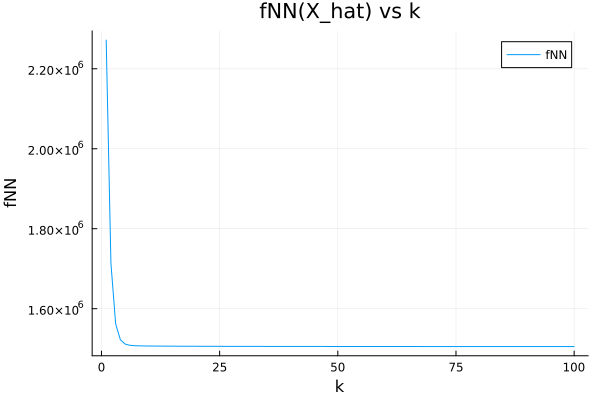

In [9]:
k = 1:1:100

plot(k, data.Q13_5_ans_f, label="fNN", title="fNN(X_hat) vs k", xlabel="k", ylabel="fNN")

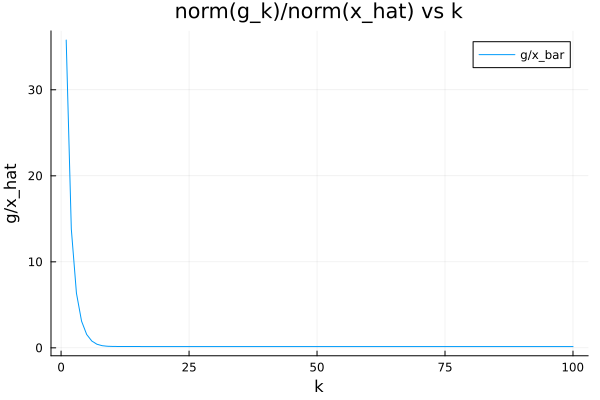

In [10]:
plot(k, data.Q13_5_ans_gx, label="g/x_bar", title="norm(g_k)/norm(x_hat) vs k", xlabel="k", ylabel="g/x_hat")

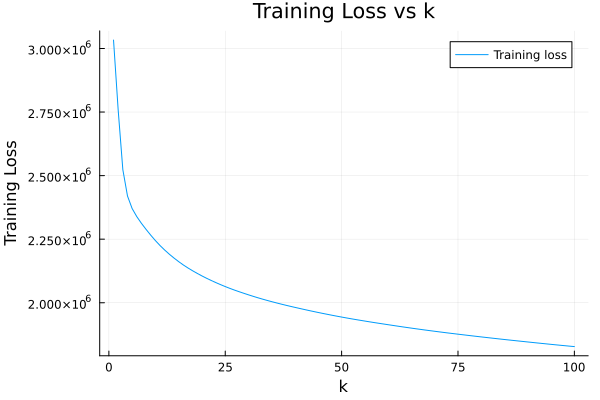

In [11]:
plot(k, data.Q13_5_ans_l, label="Training loss", title="Training Loss vs k", xlabel="k", ylabel="Training Loss")

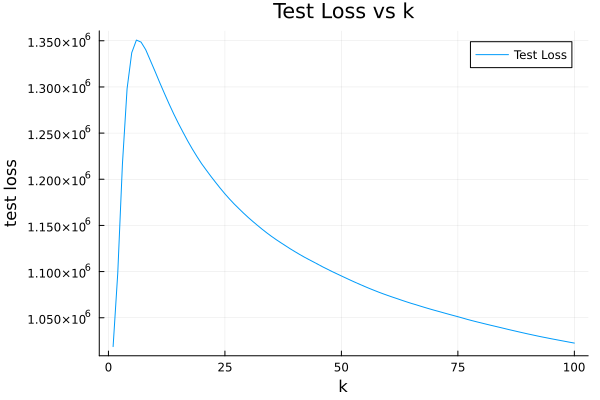

In [12]:
plot(k, data.Q13_5_ans_ltest, label="Test Loss", title="Test Loss vs k", xlabel="k", ylabel="test loss")